In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [8]:
# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')


# Display the first few rows of the dataset
print(titanic_df.head())

# Data Preprocessing
# Fill missing Age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Fill missing Embarked values with the most common embarkation port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column (too many missing values)
titanic_df.drop('Cabin', axis=1, inplace=True)

In [4]:
# Convert categorical variables to numerical values
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Split the data into features and target
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
rf = RandomForestClassifier(random_state=42)

In [9]:
# Check for missing values
print(titanic_df.isnull().sum())

# Fill missing Age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common embarkation port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column (too many missing values)
titanic_df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no missing values left
print(titanic_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


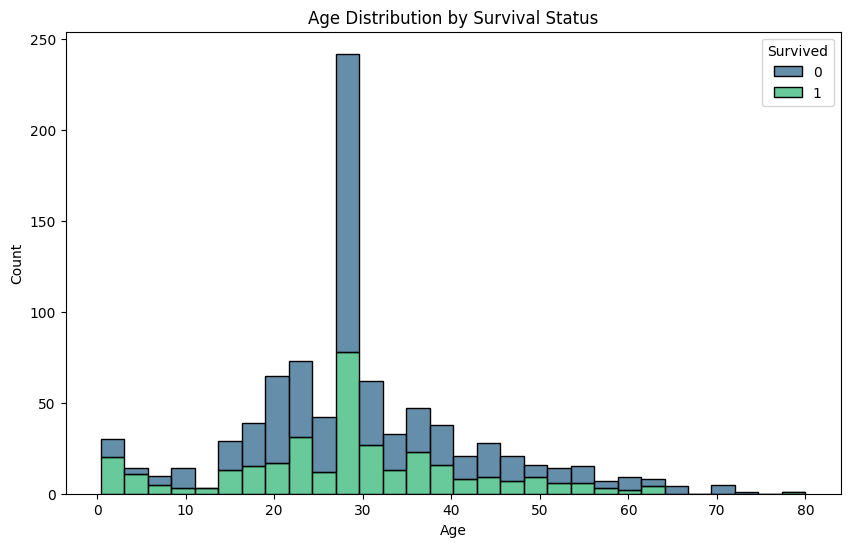

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Age by Survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', palette='viridis')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




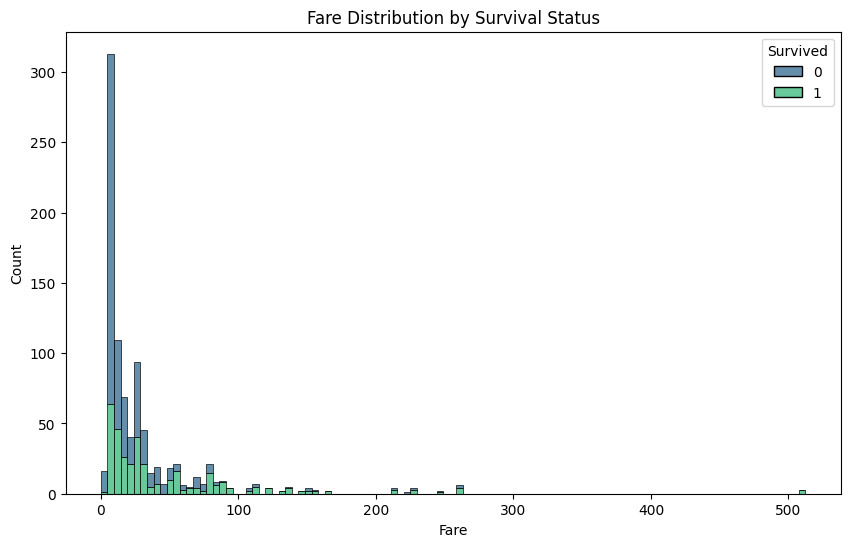

In [11]:

# Plot the distribution of Fare by Survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Fare', hue='Survived', multiple='stack', palette='viridis')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

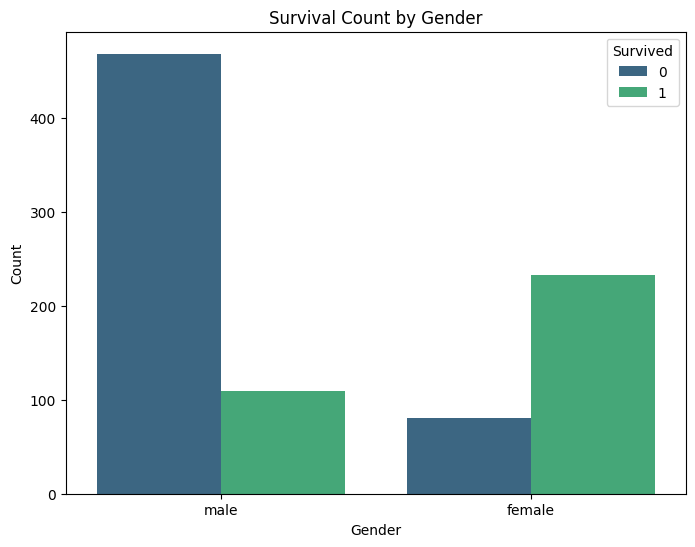

In [12]:

# Count plot of Survival by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

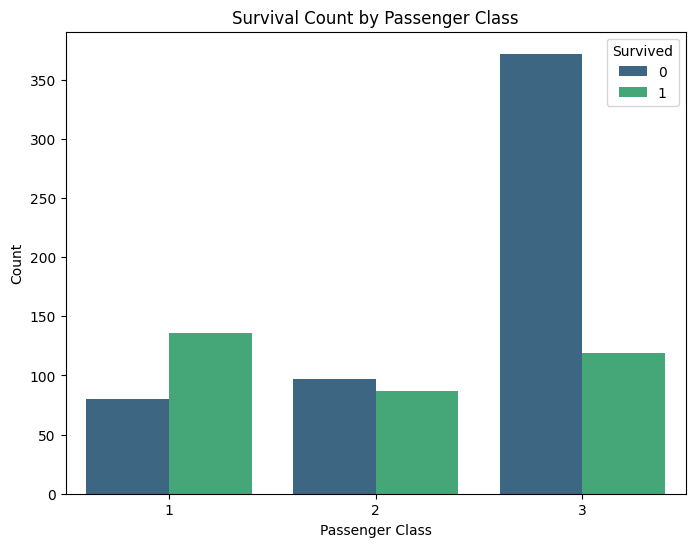

In [13]:
#Count plot of Survival by Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

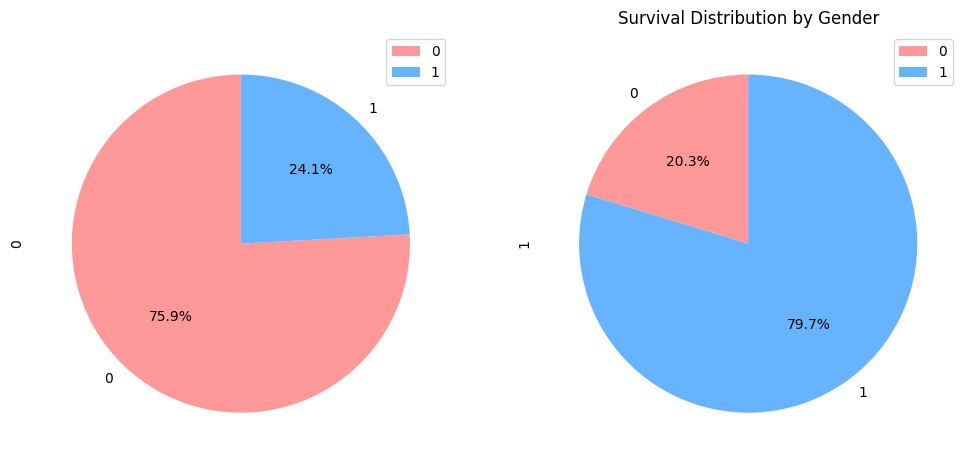

In [21]:
# Pie Chart: Survival Distribution by Gender
plt.figure(figsize=(10, 6))
survived_gender = titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
survived_gender.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], figsize=(12, 8))
plt.title('Survival Distribution by Gender')
plt.show()


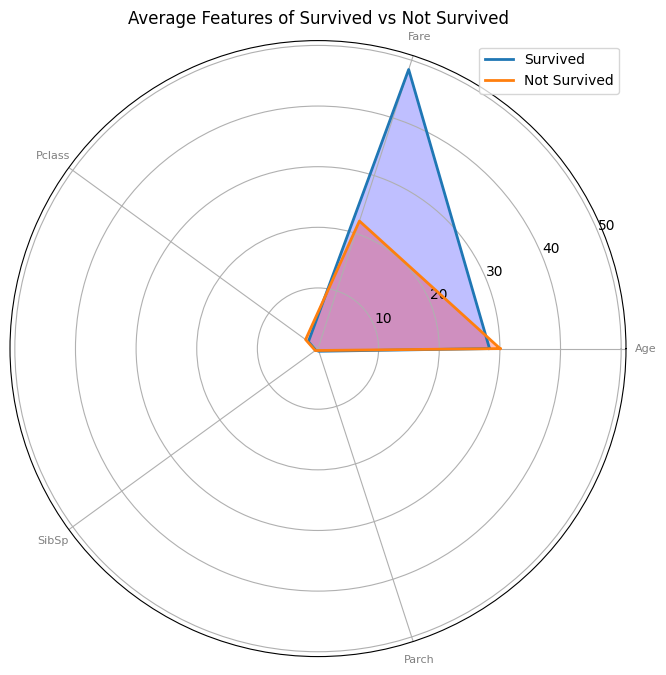

In [22]:
from math import pi

# Data for Radar Chart
survived_mean = titanic_df[titanic_df['Survived'] == 1][['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean()
not_survived_mean = titanic_df[titanic_df['Survived'] == 0][['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean()

# Combine both
df_mean = pd.DataFrame([survived_mean, not_survived_mean], index=['Survived', 'Not Survived'])

# Create radar chart
categories = list(df_mean.columns)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.plot(angles, df_mean.loc['Survived'].values.flatten().tolist() + df_mean.loc['Survived'].values.flatten().tolist()[:1], linewidth=2, linestyle='solid', label='Survived')
ax.fill(angles, df_mean.loc['Survived'].values.flatten().tolist() + df_mean.loc['Survived'].values.flatten().tolist()[:1], color='blue', alpha=0.25)

ax.plot(angles, df_mean.loc['Not Survived'].values.flatten().tolist() + df_mean.loc['Not Survived'].values.flatten().tolist()[:1], linewidth=2, linestyle='solid', label='Not Survived')
ax.fill(angles, df_mean.loc['Not Survived'].values.flatten().tolist() + df_mean.loc['Not Survived'].values.flatten().tolist()[:1], color='red', alpha=0.25)

plt.title('Average Features of Survived vs Not Survived')
plt.legend(loc='upper right')
plt.show()


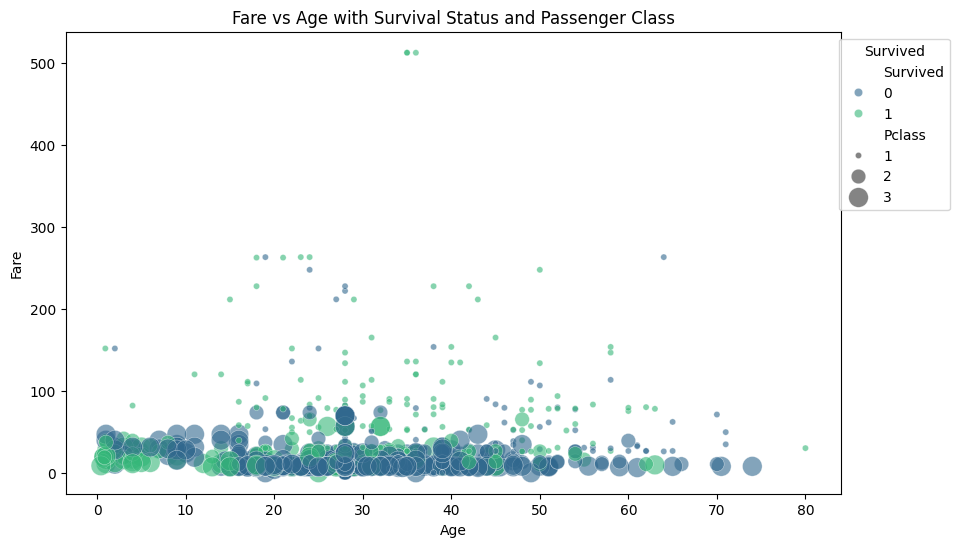

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble Chart: Fare vs Age with Survival and Passenger Class
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=titanic_df,
    x='Age',
    y='Fare',
    size='Pclass',
    hue='Survived',
    palette='viridis',
    alpha=0.6,
    sizes=(20, 200)
)

plt.title('Fare vs Age with Survival Status and Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


<Figure size 1000x1000 with 0 Axes>

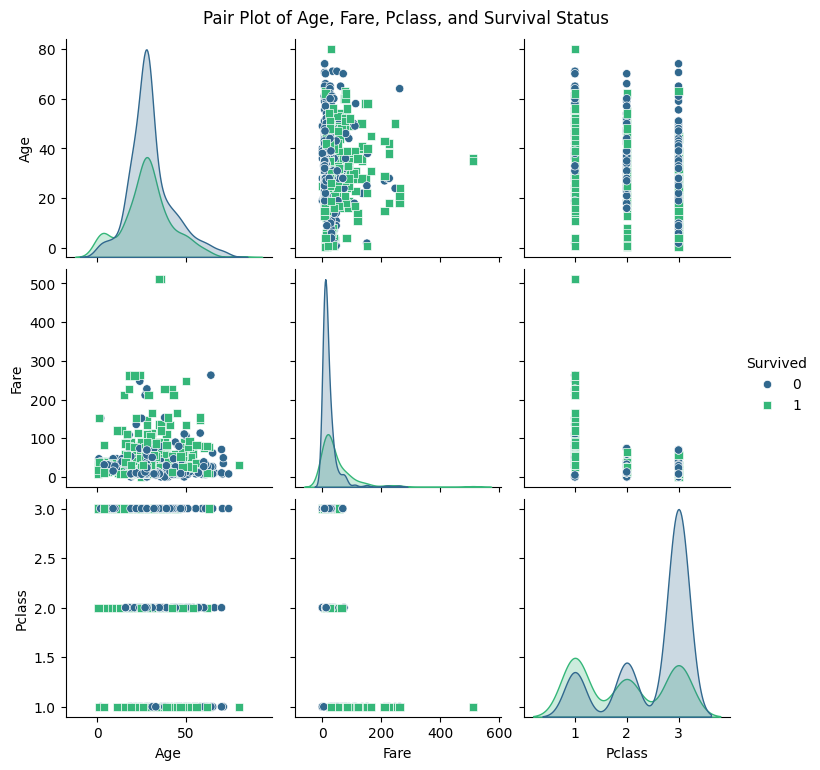

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for the pair plot
selected_columns = ['Age', 'Fare', 'Pclass', 'Survived']

# Creating the pair plot
plt.figure(figsize=(10, 10))
sns.pairplot(titanic_df[selected_columns], hue='Survived', palette='viridis', markers=["o", "s"])
plt.suptitle('Pair Plot of Age, Fare, Pclass, and Survival Status', y=1.02)
plt.show()


In [14]:
# Convert Sex to numerical values (0 = male, 1 = female)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode the Embarked column
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Display the cleaned dataset
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search to find the best model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Retrieve the best model
rf_best = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



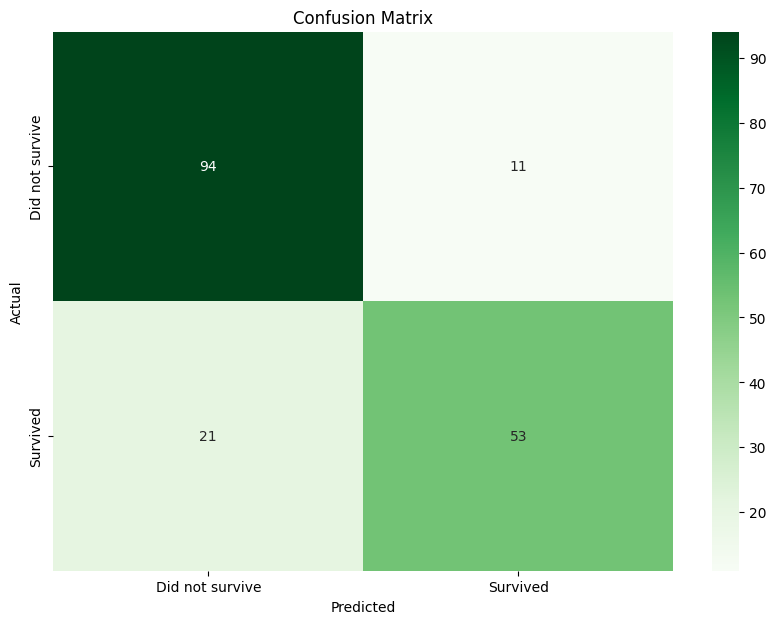

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = rf_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy, 2)}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-20-60c9fdbfb91d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


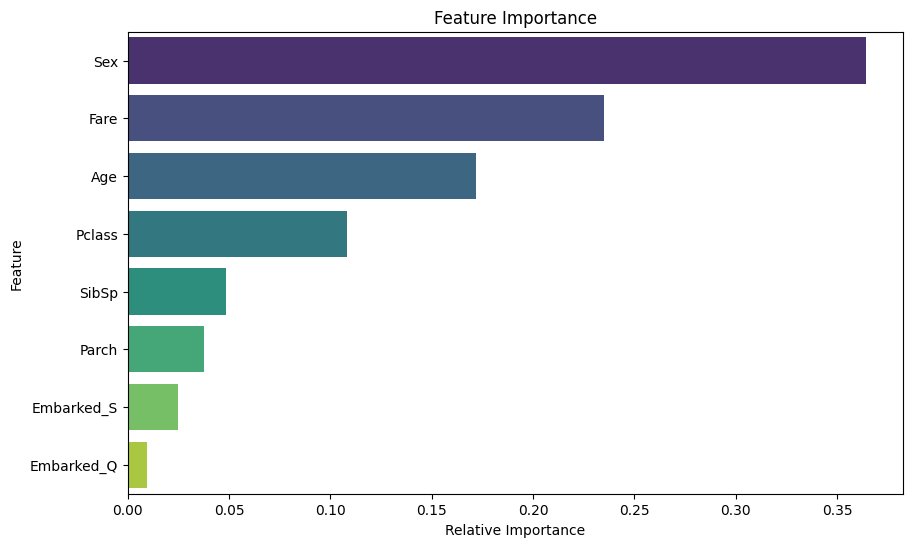

In [20]:
# Get feature importances from the best model
import numpy as np
importances = rf_best.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


In [19]:
# Define new passenger data (example)
new_transaction = {
    'Pclass': 2,
    'Sex': 0,  # male
    'Age': 20,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 1000.0,
    'Embarked_Q': 0,
    'Embarked_S': 1
}
new_transaction_df = pd.DataFrame([new_transaction])

# Predict survival for the new passenger
new_transaction_pred = rf_best.predict(new_transaction_df)
print(f'Prediction for new transaction: {"Survived" if new_transaction_pred[0] == 1 else "Did not survive"}')


Prediction for new transaction: Did not survive
